In [2]:
import warnings, gc
import numpy as np 
import pandas as pd
import matplotlib.colors
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
from datetime import datetime, timedelta
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff
from tqdm.auto import tqdm
import copy
import math
import random
import matplotlib.pyplot as plt

First we load the array computed in the other notebook. It's a NxM array containing a simulation of daily spreadys for M days of N different portfolios

In [3]:
arr=np.load('output/daily_spreads.npy')
arr.shape

(2730, 205)

The array has 679 rows, one for each portfolio and 205 column, one for each day. Each element [i,j] is the daily spread of the portfolio i in the day j

In [4]:
std=np.std(arr,axis=0)

I should modyfy those functions so that they return the k-th nearest values

In [5]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [6]:
def find_k_nearest(array,value,k):
    '''this function returns the k nearest values to a targed value of a given array'''
    aux=np.abs(array - value)
    indices=np.argsort(aux)
    idx=indices[:k]
    return array[idx]

In [7]:
def find_nearest_sorted(array,value):
    idx = np.searchsorted(array, value, side="left")
    if idx > 0 and (idx == len(array) or math.fabs(value - array[idx-1]) < math.fabs(value - array[idx])):
        return array[idx-1]
    else:
        return array[idx]

## Some plots

for each portfolio i from 0 to n make a scatter plot of points with coordinates (day, daily_spread(portfolio(i),day))

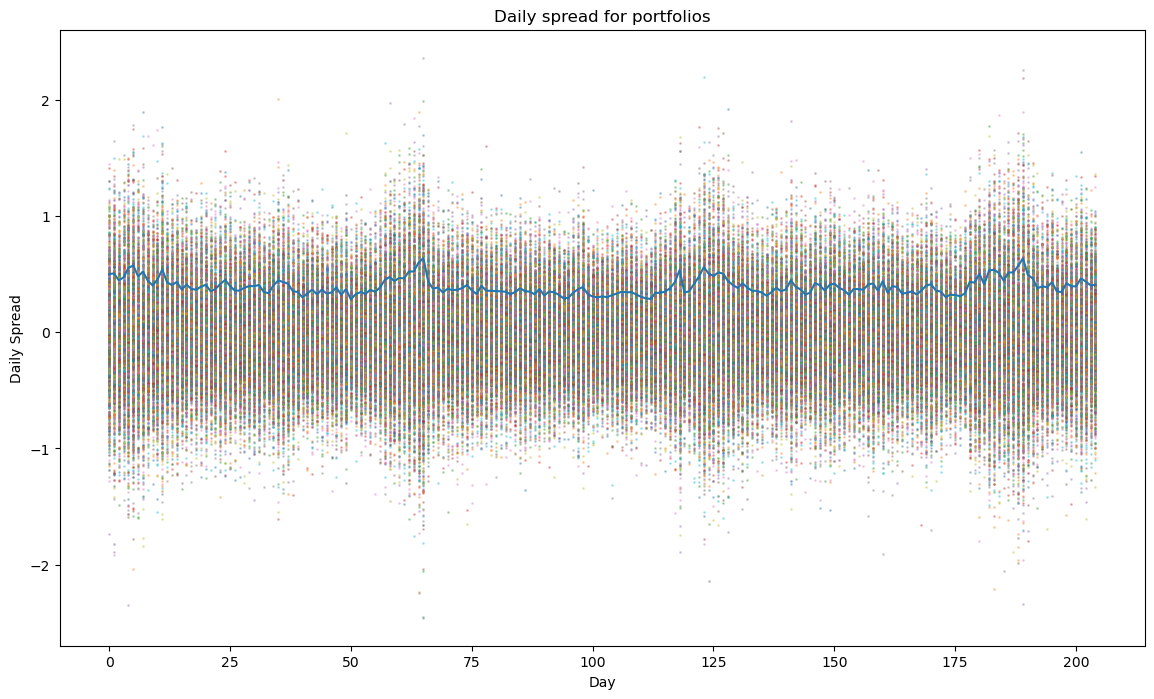

In [8]:
portfs=1000
fig=plt.figure(figsize=(14,8))
for i in range(len(arr[:portfs,0])): #for each portfolio i from 0 to n
    plt.scatter(range(len(arr[0])),arr[i],alpha=0.3,s=1) #make a scatter plot of points with coordinates (day, daily_spread(portfolio(i),day))
plt.plot(std)
plt.xlabel('Day')
plt.ylabel('Daily Spread')
plt.title('Daily spread for portfolios')
plt.show()

In [9]:
zip()

In [10]:

fig =px.scatter(x=range(len(arr[0])),y=arr[0])
#fig.add_scatter(x=range(len(arr[0])),y=arr[1])
fig.show()

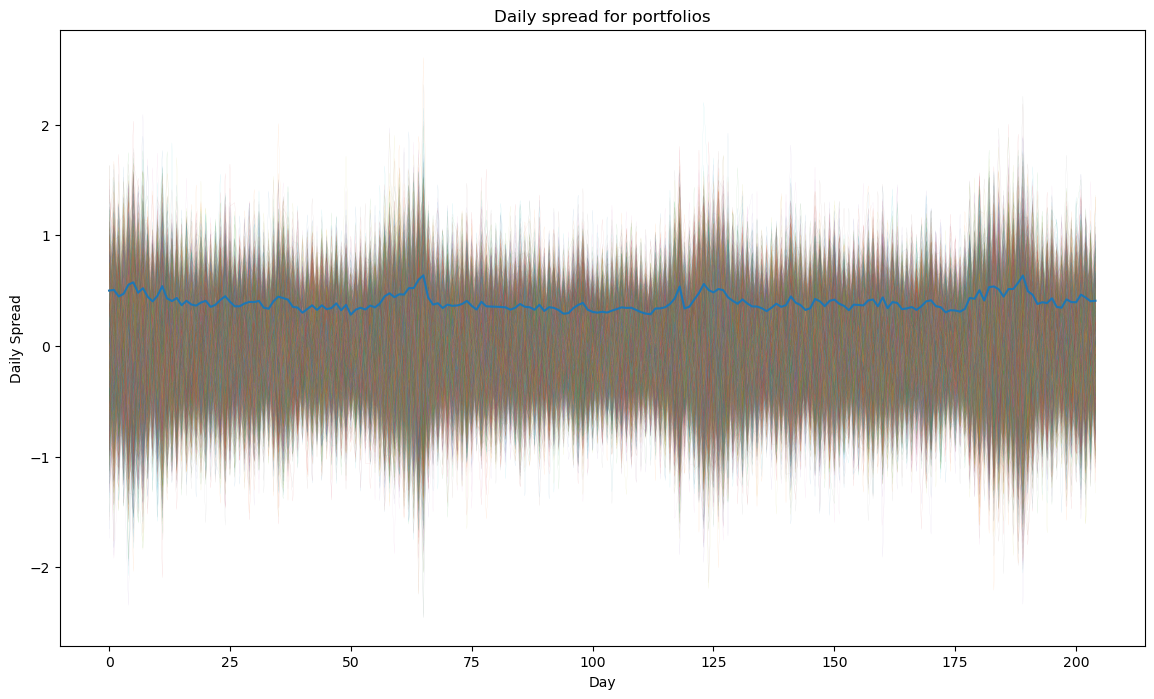

In [11]:
fig=plt.figure(figsize=(14,8))
for i in range(len(arr[:,0])): #for each portfolio i from 0 to n
    plt.plot(arr[i],alpha=0.3,linewidth=0.1) #make a scatter plot of points with coordinates (day, daily_spread(portfolio(i),day))
plt.plot(std)
plt.xlabel('Day')
plt.ylabel('Daily Spread')
plt.title('Daily spread for portfolios')
plt.show()

In [12]:
arr_sorted=np.sort(arr,axis=0)
len(arr_sorted[0])

205

In [13]:
find_nearest(arr_sorted[:,0],4)

1.635275335458212

In [14]:
np.apply_along_axis(find_nearest,0,arr,4)

array([1.63527534, 1.67032167, 1.73228805, 1.61965359, 1.74850062,
       2.0335372 , 1.51695966, 2.09275056, 1.69297654, 1.61109023,
       1.74457204, 1.76746539, 1.75639809, 1.83644997, 1.70227916,
       1.23156156, 1.51686567, 1.2819251 , 1.45570086, 1.49130506,
       1.24984652, 1.16325249, 1.14863548, 1.55290558, 1.5582594 ,
       1.64464461, 1.29558813, 1.17733759, 1.22495847, 1.30796154,
       1.41512986, 1.40350037, 1.20305319, 1.39739812, 1.53505265,
       2.01052197, 1.47548985, 1.44663993, 1.29324779, 1.26789164,
       1.04664977, 1.18618547, 1.33419275, 1.08559832, 1.23404558,
       1.0607862 , 1.20444688, 1.17537157, 1.0451383 , 1.71548022,
       0.99299942, 1.26069158, 1.25948751, 1.2884172 , 1.33281426,
       1.27139683, 1.45427424, 1.62752203, 1.97193345, 1.90413958,
       1.81786604, 1.79371463, 1.93665249, 1.84323221, 1.89630816,
       2.60668784, 1.31267812, 1.18012671, 1.4573326 , 1.05984613,
       1.27250867, 1.29113614, 1.1746844 , 1.22328803, 1.47237

In [15]:
np.apply_along_axis(find_nearest_sorted,0,arr_sorted,4)

array([1.63527534, 1.67032167, 1.73228805, 1.61965359, 1.74850062,
       2.0335372 , 1.51695966, 2.09275056, 1.69297654, 1.61109023,
       1.74457204, 1.76746539, 1.75639809, 1.83644997, 1.70227916,
       1.23156156, 1.51686567, 1.2819251 , 1.45570086, 1.49130506,
       1.24984652, 1.16325249, 1.14863548, 1.55290558, 1.5582594 ,
       1.64464461, 1.29558813, 1.17733759, 1.22495847, 1.30796154,
       1.41512986, 1.40350037, 1.20305319, 1.39739812, 1.53505265,
       2.01052197, 1.47548985, 1.44663993, 1.29324779, 1.26789164,
       1.04664977, 1.18618547, 1.33419275, 1.08559832, 1.23404558,
       1.0607862 , 1.20444688, 1.17537157, 1.0451383 , 1.71548022,
       0.99299942, 1.26069158, 1.25948751, 1.2884172 , 1.33281426,
       1.27139683, 1.45427424, 1.62752203, 1.97193345, 1.90413958,
       1.81786604, 1.79371463, 1.93665249, 1.84323221, 1.89630816,
       2.60668784, 1.31267812, 1.18012671, 1.4573326 , 1.05984613,
       1.27250867, 1.29113614, 1.1746844 , 1.22328803, 1.47237

In [16]:
def k_n_array(arr,value,k,axis=0):
    '''returns the k-th nearest values to a certain value along an axis of a given array'''
    def findk(array,value,k):
        aux=np.abs(array - value)
        indices=np.argsort(aux)
        idx=indices[:k]
        return array[idx]
    return np.apply_along_axis(findk,axis,arr,value,k)

In [17]:
k=10
v=4
np.apply_along_axis(find_k_nearest,0,arr,v,k)

array([[1.63527534, 1.67032167, 1.73228805, ..., 1.24611161, 1.48647523,
        1.36405595],
       [1.63099627, 1.64342103, 1.55653111, ..., 1.23312689, 1.22690387,
        1.34785464],
       [1.6262359 , 1.5996959 , 1.48859131, ..., 1.19064559, 1.13055794,
        1.3456703 ],
       ...,
       [1.36268852, 1.45153932, 1.26662456, ..., 1.1501906 , 1.03531266,
        1.08477304],
       [1.32539696, 1.41280939, 1.25801693, ..., 1.14835307, 1.02831851,
        1.07814398],
       [1.30304386, 1.39471843, 1.25546566, ..., 1.14451581, 1.0246459 ,
        1.07713176]])

In [18]:
find_nearest_sorted(arr_sorted[:,0],4)

1.635275335458212

In [19]:
d_sp=np.arange(-3,3,step=0.01)

Now, for each day, and for each value of daily spread, I compute the 5 closest values of daily sperad to it achiaved by my portfolios

In [20]:
vals=[]
for d in tqdm(d_sp):
    vals.append(k_n_array(arr_sorted,d,30))

  0%|          | 0/600 [00:00<?, ?it/s]

In [21]:
def sharpe_dspr(array,knn=30,step=0.01):
    '''returns the sharpe ratio obtained trying to keep
     a constant daily spread for the time period considered
    Input: 
    
    array: an array of shape n_portfolios x m_days
    knn: the number of closest daily spread to average
    '''
    d_sp=np.arange(-3,3,step=step)
    vals=[]
    for d in tqdm(d_sp):
        vals.append(k_n_array(array,d,knn))
    vals=np.array(vals)
    aa=vals.mean(axis=1)
    sharpe=aa.mean(1)/aa.std(1)
    return sharpe

In [22]:
vals=np.array(vals)
vals.shape

(600, 30, 205)

this is an array of dimension (n_steps x n_neighbours x days)

In [23]:
step=0.005
sharpe=sharpe_dspr(arr,30,step)
d_sp=np.arange(-3,3,step=step)

  0%|          | 0/1200 [00:00<?, ?it/s]

Let's recreate the plot in https://www.youtube.com/watch?v=51tM3ktXqPY to find the optimal value of daily spread

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

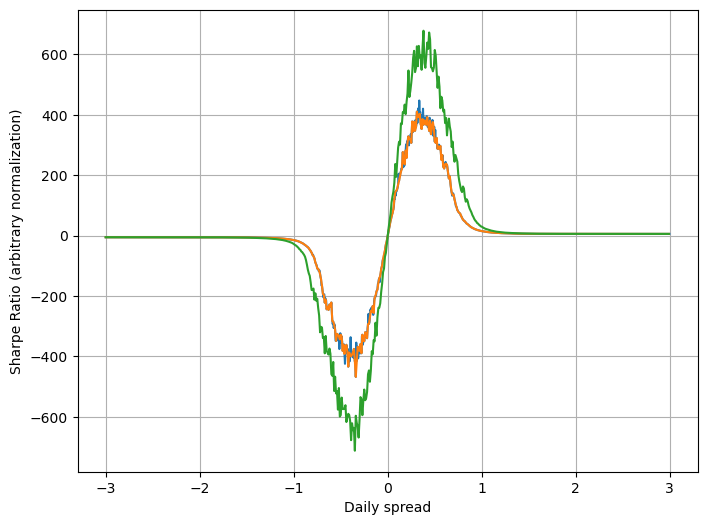

In [24]:
plt.figure(figsize=(8,6))
plt.plot(d_sp,sharpe)
step=0.01
plt.plot(np.arange(-3,3,step=step),sharpe_dspr(arr,30,step))
plt.plot(np.arange(-3,3,step=step),sharpe_dspr(arr,10,step))
plt.grid()
plt.xlabel('Daily spread')
plt.ylabel('Sharpe Ratio (arbitrary normalization)')
plt.show()